# Using SOM to cluster the forest fire dataset

In this notebook, I will use the Self-Organizing Map (SOM) algorithm to cluster the forest fire dataset. The dataset belongs to the UCI Machine Learning Repository and contains data on forest fires in the northeast region of Portugal. The dataset has 517 instances and 13 attributes. To apply the SOM algorithm, we need to load, transform, and fit the data.

As usual, we need to loading the necessary libraries and the dataset.

In [260]:
from ucimlrepo import fetch_ucirepo 
from sklearn_som.som import SOM
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler

We start the analysis, we need to load the necessary libraries and the dataset, in order to process the data we define a dataframe with the dataset.

In [261]:
forest_fires = fetch_ucirepo(id=162)

X = forest_fires.data.features
Y = forest_fires.data.targets

df = pd.DataFrame(X)

df['burned_area'] = Y.values

To find the most relevant attributes, we will use the correlation matrix and the heatmap. Excluding the categorical attributes, using corr() we calculate the correlation of each pair of attributes and plot them in a heatmap. As we can se in the heatmap, the attributes temp and RH have a high correlation with the area attribute.

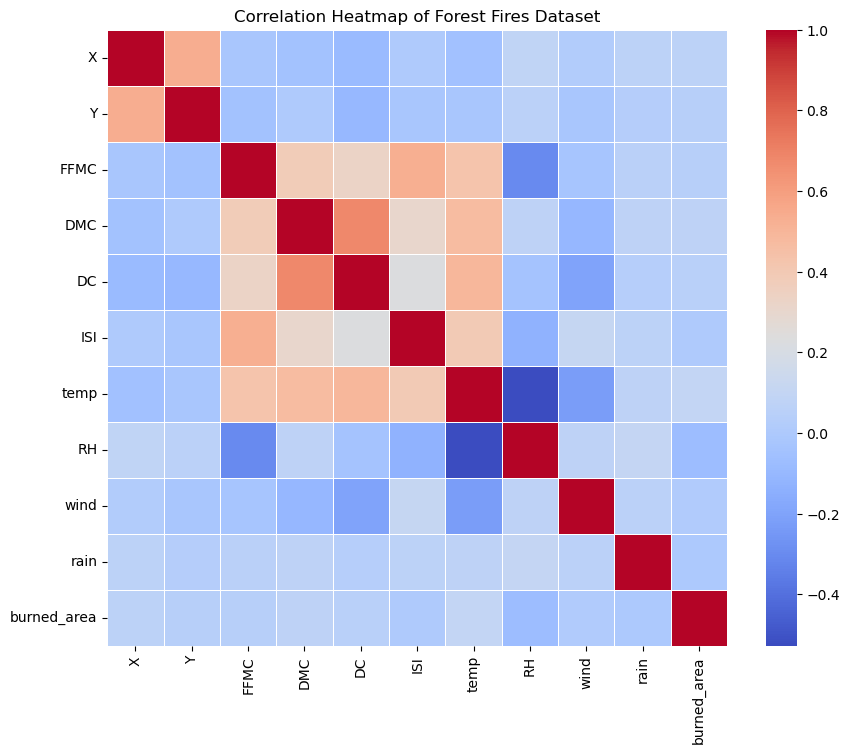

In [262]:

categorical_columns = ['month', 'day']
df_numerical = df.drop(columns=categorical_columns)

correlation_matrix = df_numerical.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Forest Fires Dataset')
plt.show()

Using those attributes, we will apply the SOM algorithm to cluster the dataset. We extract the values of the attributes temp, RH, and area and normalize them using the MinMaxScaler. Then, we fit the SOM algorithm to the normalized data.

In [263]:
correlations_with_target = correlation_matrix['burned_area'].drop('burned_area')

top_2_features = correlations_with_target.abs().nlargest(2).index.tolist()
print(f"The two most correlated features are: {top_2_features}")

data = df[top_2_features].values

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

The two most correlated features are: ['temp', 'RH']


As indicated by the dataset information, the area attribute is highly skewed. To reduce the skewness, we will apply the log transformation to the area attribute. We will then apply the SOM algorithm to the transformed data.

In [264]:
Y_log = np.log1p(Y.values)

Now we setup the SOM algorithm, setting an m and n value of 10 and 10, respectively, this will create a 10x10 grid of neurons. We will then fit the SOM algorithm to the transformed data. The random_state variable represent the seed used by the random number generator, we use it to ensure reproducibility, tht means that the same results will be obtained every time the code is run.



In [265]:
forest_som = SOM(m=10, n=10, dim=2, random_state=42)
forest_som.fit(data_scaled)

After fitting the SOM algorithm, we will extract the winning nodes and the corresponding clusters.

In [266]:
predictions = forest_som.predict(data_scaled)
print(predictions)

[30 39 37 96 96 55 65 96 40 82 22 44 50 92 74 72  2 21 46 19  3 44 53  4
 75 42 39 91  9 82 64 96 49 35 66 51 55 78 70 20 94 34 60 91 86 64 50 93
 98 89 70 54 12 12 15 74 51 79 20 79 98 97 48 66 65 14 94 56 56 70  2 45
  2 25 74 96 26 97 41 70 44 24 22 21 13  0 64 81 83 70 77 70 66 34 65 51
 79 70 96 44 44 41 12 65 96 79 10 66 13 60 20 70 82 48  2  2 47  2 98 11
 96 25  1 24 85 70 30 25 16 37 36 28 89 57 27 22 42 41 34 81 92 75 62 68
 75 74 29 65 25 65 82 64 90 85  9 21 74 76 49 39  2 12  2 60 51 97 21 75
  2 53 81 33 49 35 31 49 30  4 76 41 75 56 79 21 66 43 98 53 20 78 98 65
 65 65 65 94 30  0 77 82 54 79 97 49 41 54 55 49 56 65 70 96 85 89 38 38
 42 86 70  2 42 23 89 50 32 82 26 56 74 26 74 74  4 63 70 58  5  3 64 50
  6 70 41 51 62 73 63 51 74 92 74 94 81 49  3  1 72 53 61 63 74 96 92 44
 62 62 52 65 66 22 62 61 85 97 97 97 99 99 99 99 97 99 30 98 19 82 96 62
 75 64 22 63 82 74 51 62 17 17 58 96 70 44 44 44 96 22 68 75 16 64 64 64
 96 65 58 10 70 70 55 55 39 38 38 29 31 65 65 66 11

In [267]:
predictions_log = np.log1p(predictions)

Finally, we will plot the clusters on the map. The first plot shows the clusters of the original data, while the second plot shows the clusters of the predicted data.

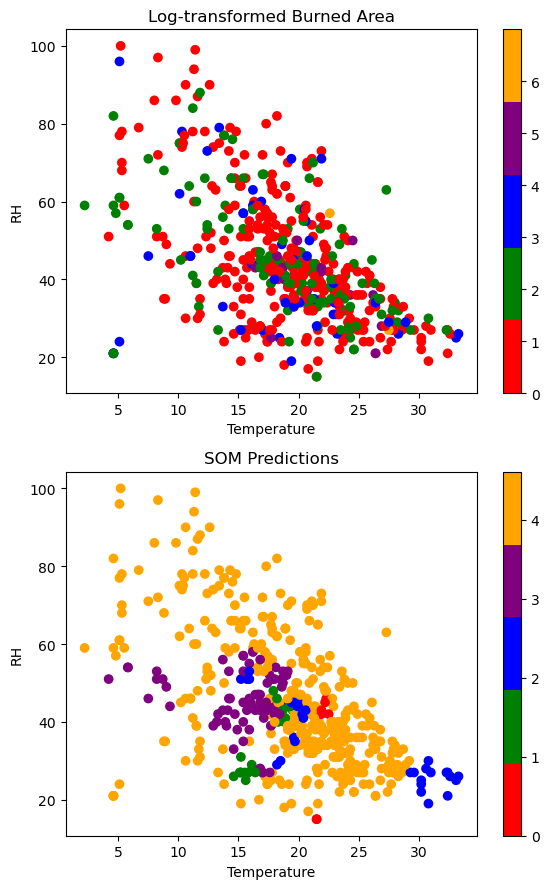

In [268]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6, 9))

x = data[:, 0]  
y = data[:, 1]  
colors = ['red', 'green', 'blue', 'purple', 'orange']  

scatter_1 = ax[0].scatter(x, y, c=Y_log, cmap=ListedColormap(colors))
ax[0].set_title('Log-transformed Burned Area')
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel('RH')

scatter_2 = ax[1].scatter(x, y, c=predictions_log, cmap=ListedColormap(colors))
ax[1].set_title('SOM Predictions')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel('RH')

plt.colorbar(scatter_1, ax=ax[0])
plt.colorbar(scatter_2, ax=ax[1])
plt.tight_layout()
plt.show()